In [1]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

%reload_ext autoreload
%autoreload 2

# Generate data

Generate a small toy dataset from 3 multivariate Gaussians. Plot the data.

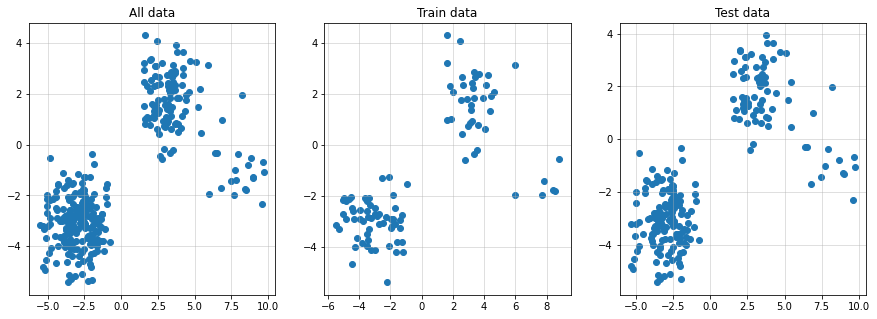

In [3]:
X = np.vstack((np.random.multivariate_normal([-3, -3], [[1, 0], [0, 1]], 200),
               np.random.multivariate_normal([3, 2], [[1, 0], [0, 1]], 100),
               np.random.multivariate_normal([8, -1], [[1, 0], [0, 1]], 20)))
np.random.shuffle(X)
Xtr, Xte = X[:100, :], X[100:, :]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].scatter(X[:, 0], X[:, 1]); axes[0].set_title('All data')
axes[1].scatter(Xtr[:, 0], Xtr[:, 1]); axes[1].set_title('Train data')
axes[2].scatter(Xte[:, 0], Xte[:, 1]); axes[2].set_title('Test data')
for i in range(len(axes)): axes[i].grid(alpha=0.5)

We can clearly see the three clusters in the data. Let's call them: cluster 1, 2, and 3 for respectively the cluster with 100, 50, and 10 instances.

# Detect outliers

## kNNO

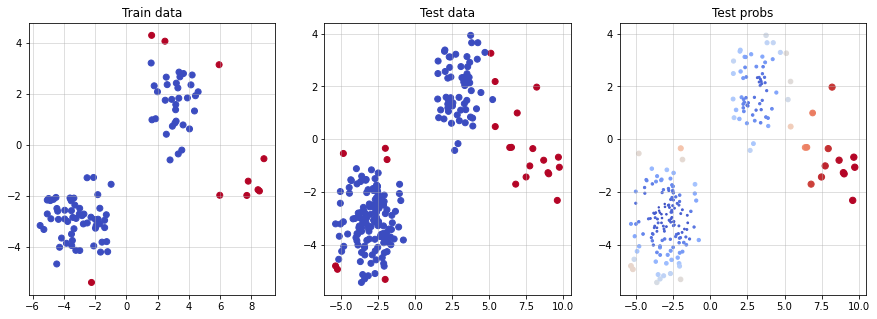

In [4]:
from anomatools.models import kNNO

detector = kNNO(k=10, contamination=0.1, weighted=False)

train_labels = detector.fit_predict(Xtr)
test_labels = detector.predict(Xte)
test_probs = detector.predict_proba(Xte)[:, 1]  # anomaly probabilities

# plot the predictions
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].scatter(Xtr[:, 0], Xtr[:, 1], c=train_labels, cmap=plt.cm.coolwarm); axes[0].set_title('Train data')
axes[1].scatter(Xte[:, 0], Xte[:, 1], c=test_labels, cmap=plt.cm.coolwarm); axes[1].set_title('Test data')
axes[2].scatter(Xte[:, 0], Xte[:, 1], s=test_probs*40, c=test_probs, cmap=plt.cm.coolwarm); axes[2].set_title('Test probs')
for i in range(len(axes)): axes[i].grid(alpha=0.5)

## iNNE

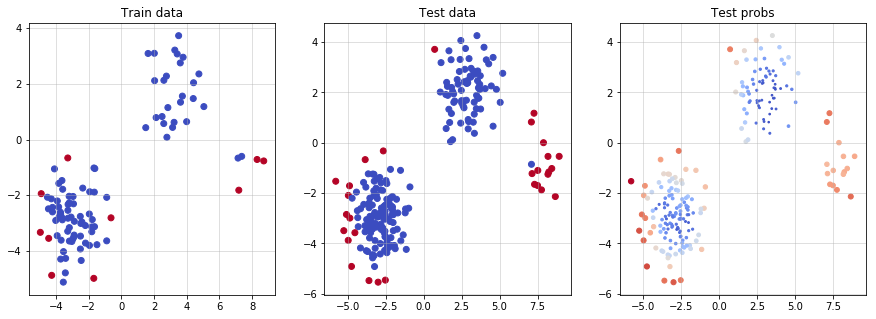

In [5]:
from anomatools.models import iNNE

detector = iNNE(n_members=200, contamination=0.1)

train_labels = detector.fit_predict(Xtr)
test_labels = detector.predict(Xte)
test_probs = detector.predict_proba(Xte)[:, 1]  # anomaly probabilities

# plot the predictions
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].scatter(Xtr[:, 0], Xtr[:, 1], c=train_labels, cmap=plt.cm.coolwarm); axes[0].set_title('Train data')
axes[1].scatter(Xte[:, 0], Xte[:, 1], c=test_labels, cmap=plt.cm.coolwarm); axes[1].set_title('Test data')
axes[2].scatter(Xte[:, 0], Xte[:, 1], s=test_probs*40, c=test_probs, cmap=plt.cm.coolwarm); axes[2].set_title('Test probs')
for i in range(len(axes)): axes[i].grid(alpha=0.5)